In [1]:
import graphviz
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split


In [2]:
data=load_iris()

In [3]:
data.data.shape


(150, 4)

In [4]:
print(data.target_names)
print(data.feature_names)

['setosa' 'versicolor' 'virginica']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [12]:
xtrain,xtest,ytrain,ytest=train_test_split(data.data,data.target,test_size=0.3,random_state=1)

In [14]:
xtrain.shape

(105, 4)

In [16]:
print(ytrain.shape)
ytrain

(105,)


array([2, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 1, 0, 2, 2, 0, 0, 2, 0,
       2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 1, 2, 1, 0, 0, 0, 2, 0, 1, 2, 2, 0,
       0, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 2, 1, 2, 0])

In [19]:
name=['gini','entropy']

In [20]:
for i in name:
    clf=tree.DecisionTreeClassifier(criterion=i,random_state=1)
    clf=clf.fit(xtrain,ytrain)
    score=clf.score(xtest,ytest)
    print(score)

0.9555555555555556
0.9555555555555556


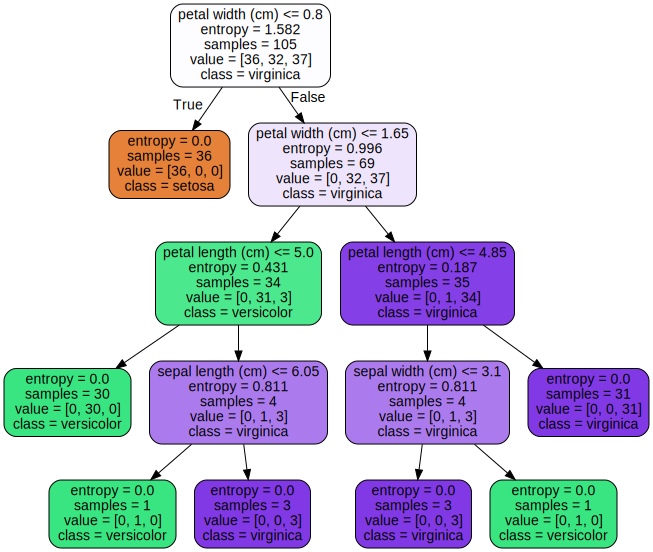

In [23]:
dot_data=tree.export_graphviz(clf,
                             feature_names=data.feature_names,
                             class_names=['setosa', 'versicolor', 'virginica'],
                             filled=True,
                             rounded=True,)
graph=graphviz.Source(dot_data)
graph

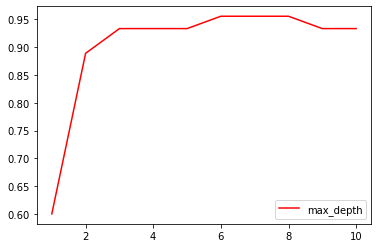

5 0.9555555555555556


In [31]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30 #输入“random"，决策树在分枝时会更加随机，树会因为含有更多的不必要信息而更深更大，并因这些不必要信息而降低对训练集的拟合。
                                      # 这也是防止过拟合的一种方式。当你预测到你的模型会过拟合，用这两个参数来帮助你降低树建成之后过拟合的可能性。
                                    ,splitter="random"
                                    )
    clf = clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()
print(test.index(max(test)),max(test))

In [28]:
test.index(max(test))

5

In [33]:
print(clf.predict(xtest))
print(ytest)
ytest==clf.predict(xtest) #只预测错了2个结果

[0 1 1 0 2 2 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 1 2 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]


array([ True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True])

In [34]:
from sklearn.model_selection import cross_val_score

In [39]:
classifier=tree.DecisionTreeClassifier(max_depth=5,random_state=1)
cross_val_score(classifier,xtrain,ytrain,cv=10).mean()

0.9609090909090909

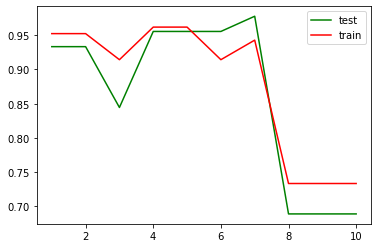

7 0.9777777777777777


In [46]:
train =[]
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=5
                                    ,criterion="entropy"
                                    ,random_state=1
                                    ,splitter="random"
                                    ,min_samples_leaf=5+i,
                                    )
    clf = clf.fit(xtrain, ytrain)
    score = clf.score(xtest, ytest)
    score_train=clf.score(xtrain,ytrain)
    test.append(score)
    train.append(score_train)
    
plt.plot(range(1,11),test,color="green",label="test")
plt.plot(range(1,11),train,color="red",label="train")
plt.legend()
plt.show()
print(test.index(max(test))+1,max(test))

In [48]:
clf = tree.DecisionTreeClassifier(max_depth=5
                                    ,criterion="entropy"
                                    ,random_state=1
                                    ,splitter="random"
                                    ,min_samples_leaf=12,
                                    )

In [50]:
ypredict=clf.fit(xtrain,ytrain).predict(xtest)
ypredict==ytest #现在只错了一个

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [51]:
#为了进一步探索有没有更好的参数，现在使用网格搜索
from sklearn.model_selection import GridSearchCV

In [83]:
parameters={"criterion":np.array(['gini','entropy']),
            "max_depth":range(5,15),
            "min_samples_leaf":range(12,20),
            "min_samples_split":range(2,20),
            "splitter":['random'],
}

In [84]:
GS=GridSearchCV(tree.DecisionTreeClassifier(),parameters,cv=10)


In [85]:
GS.fit(xtrain,ytrain)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': array(['gini', 'entropy'], dtype='<U7')

In [86]:
print(GS.best_params_)
print(GS.best_score_) #发现结果并没有之前的好，所以不添加参数min_samples_split搜索更为合适


{'criterion': 'entropy', 'max_depth': 12, 'min_samples_leaf': 13, 'min_samples_split': 6, 'splitter': 'random'}
0.9527272727272728


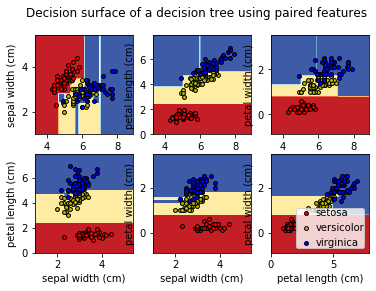

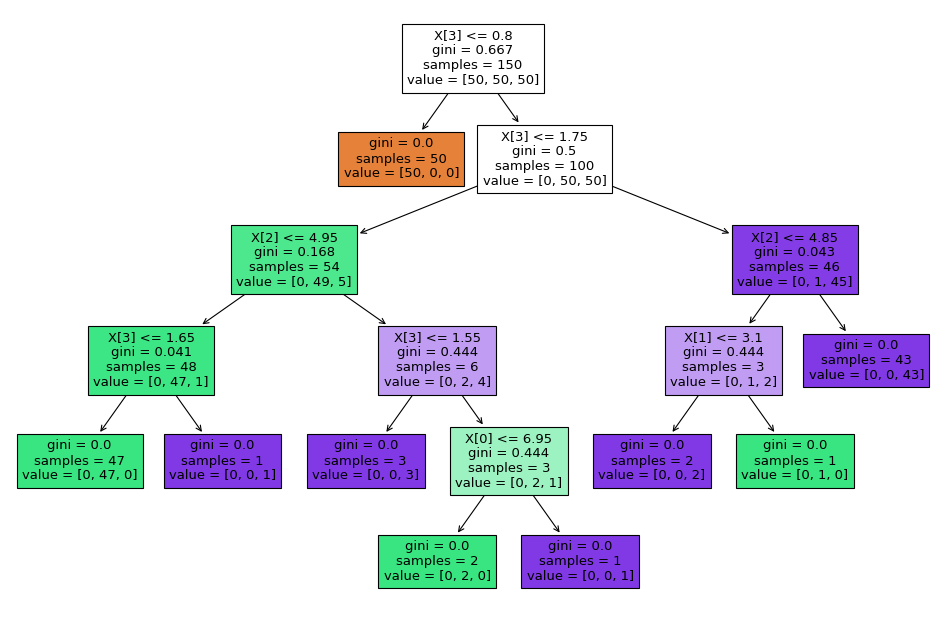

In [93]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)
    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.mgrid[x_min:x_max:100j,y_min:y_max:100j]
#     plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(15,10),dpi=80)
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

In [5]:
data=pd.concat([pd.DataFrame(data.data,columns=data.feature_names),pd.DataFrame(data.target,columns=['Species'])],
               axis=1)
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
species_name=load_iris()

In [7]:
species_name.target_names

data.Species=data.Species.astype('str')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
Species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [8]:
species_map={
    '0':'setosa',
    '1':'versicolor',
    '2':'verginica',
}

data.Species=data.Species.map(species_map)

In [9]:
data.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


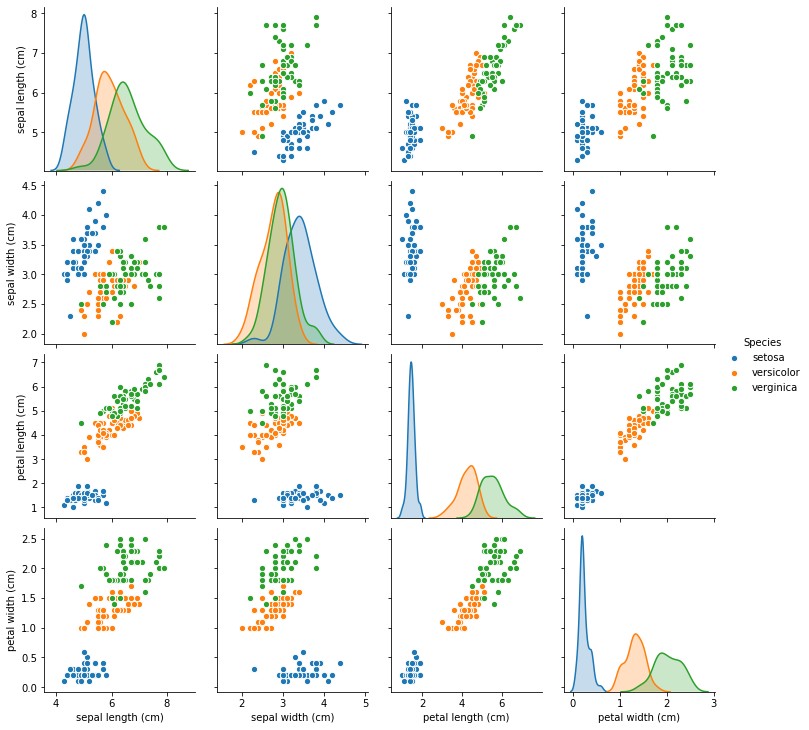

In [10]:
import seaborn as sns
sns.pairplot(data,
             kind='scatter',
             hue='Species',
            plot_kws=dict(s=40, edgecolor="white", linewidth=1)) #散点图的一些详细设置)